In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [3]:
# Function to preprocess images
def preprocess_image(image):
    image_gray = rgb2gray(image)  # Convert to grayscale
    image_resized = resize(image_gray, (32, 32))  # Resize to 32x32
    return image_resized

In [4]:
def extract_lbp_features(images, P=8, R=1):
    lbp_features = []
    for image in images:
        processed_image = preprocess_image(image)
        lbp = local_binary_pattern(processed_image, P, R, method="uniform")  # Compute LBP
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), density=True)  # Histogram
        lbp_features.append(hist)
    return np.array(lbp_features)


In [5]:
# Extract LBP features for training and testing
X_train_lbp = extract_lbp_features(X_train[:5000])  # Using subset for faster computation
X_test_lbp = extract_lbp_features(X_test[:1000])

/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [6]:
# Normalize features
scaler = StandardScaler()
X_train_lbp = scaler.fit_transform(X_train_lbp)
X_test_lbp = scaler.transform(X_test_lbp)


In [ ]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_lbp, y_train[:5000])  # Train on subset

In [ ]:
# Predictions
y_pred = clf.predict(X_test_lbp)

In [ ]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))

Accuracy: 0.261
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.22      0.23       103
           1       0.21      0.33      0.25        89
           2       0.25      0.18      0.21       100
           3       0.21      0.17      0.18       103
           4       0.30      0.42      0.35        90
           5       0.21      0.28      0.24        86
           6       0.44      0.46      0.45       112
           7       0.24      0.19      0.21       102
           8       0.25      0.17      0.20       106
           9       0.23      0.21      0.22       109

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

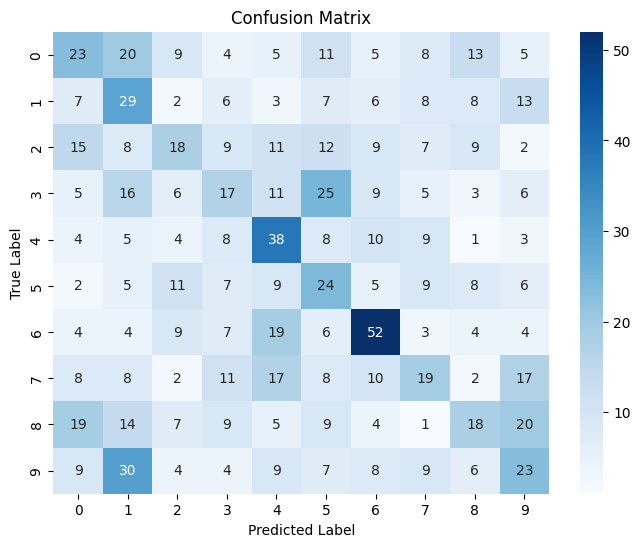

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()